In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from keras import metrics 
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def load_data(country, data_lis):
    df = pd.read_csv('owid-covid-data.csv')
    df = df[df['location'].isin([country])]
    if data_lis != None:
        df = df.filter(items=data_lis)

    for column in df.columns.values:
        df[column] = df[column].fillna(0)
        
    return df
    
def add_rows(df, num_rows, fill):
    "add the number "
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    rows = {}
    for column in df.columns.values:
        rows[column] = [fill for _ in range(num_rows)]
    rows = pd.DataFrame(rows) 
    df = pd.concat([rows, df], ignore_index=True)
    df = df.reset_index()
    return df


In [3]:
columns = ['date', 'total_cases', 'total_deaths', 'total_tests', 'total_vaccinations']
days_offset = 3
df = load_data('Canada', None)

dates = df['date']

df = df.drop(['date', 'iso_code', 'continent', 'location', 'tests_units'], axis=1)

targets = df['total_cases']
features = df['total_cases']

features = add_rows(features, days_offset, 0)
future_x = features[-days_offset:]
features = features[:-days_offset]

train_x, test_x, train_y, test_y = train_test_split(features, targets, test_size=0.5, random_state=43)

train_x = train_x.drop(['index'], axis=1)
train_x = np.array(train_x)
train_x = train_x.reshape(1,1,train_x.shape[0])

train_y = np.array(train_y)
train_y = train_y.reshape(1,1,train_y.shape[0])


test_x = test_x.drop(['index'], axis=1)
test_x = np.array(test_x)
test_x = test_x.reshape(1,1,test_x.shape[0])

test_y = np.array(test_y)
test_y = test_y.reshape(1,1,test_y.shape[0])

print('Data and data split info:')
print('------------------------')
print(type(train_x))
print(f'shape of training fetures data: {train_x.shape}')
print(f'shape of testing target data:  {train_y.shape}')
print('------------------------')

Data and data split info:
------------------------
<class 'numpy.ndarray'>
shape of training fetures data: (1, 1, 444)
shape of testing target data:  (1, 1, 444)
------------------------


In [4]:
model = Sequential()  
model.add(LSTM(train_x.shape[-1], input_shape=(1,train_x.shape[-1]), return_sequences=False))
model.add(Dense(train_x.shape[-1]))
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam',metrics=[metrics.mean_squared_error,
                                                                   metrics.mean_absolute_error,
                                                                   metrics.mean_absolute_percentage_error])
model.fit(train_x, train_y, epochs=200, batch_size=100, verbose=2,validation_data=(test_x, test_y))



Epoch 1/200
1/1 - 3s - loss: 165.2140 - mean_squared_error: 3325638213632.0000 - mean_absolute_error: 1289486.1250 - mean_absolute_percentage_error: 100.0539 - val_loss: 172.9568 - val_mean_squared_error: 3176481423360.0000 - val_mean_absolute_error: 1317430.5000 - val_mean_absolute_percentage_error: 99.9521 - 3s/epoch - 3s/step
Epoch 2/200
1/1 - 0s - loss: 164.4547 - mean_squared_error: 3325637689344.0000 - mean_absolute_error: 1289486.1250 - mean_absolute_percentage_error: 100.0207 - val_loss: 172.8766 - val_mean_squared_error: 3176481423360.0000 - val_mean_absolute_error: 1317430.5000 - val_mean_absolute_percentage_error: 99.9495 - 40ms/epoch - 40ms/step
Epoch 3/200
1/1 - 0s - loss: 163.7477 - mean_squared_error: 3325637689344.0000 - mean_absolute_error: 1289486.1250 - mean_absolute_percentage_error: 99.9876 - val_loss: 172.7948 - val_mean_squared_error: 3176481423360.0000 - val_mean_absolute_error: 1317430.5000 - val_mean_absolute_percentage_error: 99.9469 - 34ms/epoch - 34ms/step


Epoch 26/200
1/1 - 0s - loss: 154.8077 - mean_squared_error: 3325635592192.0000 - mean_absolute_error: 1289485.2500 - mean_absolute_percentage_error: 99.3561 - val_loss: 170.8816 - val_mean_squared_error: 3176481161216.0000 - val_mean_absolute_error: 1317430.5000 - val_mean_absolute_percentage_error: 99.8933 - 51ms/epoch - 51ms/step
Epoch 27/200
1/1 - 0s - loss: 154.5861 - mean_squared_error: 3325635592192.0000 - mean_absolute_error: 1289485.2500 - mean_absolute_percentage_error: 99.3353 - val_loss: 170.8048 - val_mean_squared_error: 3176481161216.0000 - val_mean_absolute_error: 1317430.5000 - val_mean_absolute_percentage_error: 99.8913 - 52ms/epoch - 52ms/step
Epoch 28/200
1/1 - 0s - loss: 154.3719 - mean_squared_error: 3325635592192.0000 - mean_absolute_error: 1289485.2500 - mean_absolute_percentage_error: 99.3151 - val_loss: 170.7280 - val_mean_squared_error: 3176481161216.0000 - val_mean_absolute_error: 1317430.5000 - val_mean_absolute_percentage_error: 99.8893 - 56ms/epoch - 56ms/

Epoch 51/200
1/1 - 0s - loss: 150.8144 - mean_squared_error: 3325633757184.0000 - mean_absolute_error: 1289484.6250 - mean_absolute_percentage_error: 98.9579 - val_loss: 169.1851 - val_mean_squared_error: 3176480899072.0000 - val_mean_absolute_error: 1317430.2500 - val_mean_absolute_percentage_error: 99.8492 - 32ms/epoch - 32ms/step
Epoch 52/200
1/1 - 0s - loss: 150.6993 - mean_squared_error: 3325633757184.0000 - mean_absolute_error: 1289484.6250 - mean_absolute_percentage_error: 98.9459 - val_loss: 169.1275 - val_mean_squared_error: 3176480899072.0000 - val_mean_absolute_error: 1317430.2500 - val_mean_absolute_percentage_error: 99.8476 - 31ms/epoch - 31ms/step
Epoch 53/200
1/1 - 0s - loss: 150.5865 - mean_squared_error: 3325633757184.0000 - mean_absolute_error: 1289484.5000 - mean_absolute_percentage_error: 98.9341 - val_loss: 169.0707 - val_mean_squared_error: 3176480899072.0000 - val_mean_absolute_error: 1317430.2500 - val_mean_absolute_percentage_error: 99.8461 - 32ms/epoch - 32ms/

Epoch 76/200
1/1 - 0s - loss: 148.4480 - mean_squared_error: 3325632446464.0000 - mean_absolute_error: 1289484.1250 - mean_absolute_percentage_error: 98.7079 - val_loss: 167.9153 - val_mean_squared_error: 3176480374784.0000 - val_mean_absolute_error: 1317430.2500 - val_mean_absolute_percentage_error: 99.8131 - 34ms/epoch - 34ms/step
Epoch 77/200
1/1 - 0s - loss: 148.3701 - mean_squared_error: 3325632446464.0000 - mean_absolute_error: 1289484.1250 - mean_absolute_percentage_error: 98.6996 - val_loss: 167.8697 - val_mean_squared_error: 3176480374784.0000 - val_mean_absolute_error: 1317430.2500 - val_mean_absolute_percentage_error: 99.8117 - 49ms/epoch - 49ms/step
Epoch 78/200
1/1 - 0s - loss: 148.2932 - mean_squared_error: 3325632446464.0000 - mean_absolute_error: 1289484.1250 - mean_absolute_percentage_error: 98.6913 - val_loss: 167.8243 - val_mean_squared_error: 3176480374784.0000 - val_mean_absolute_error: 1317430.2500 - val_mean_absolute_percentage_error: 99.8104 - 61ms/epoch - 61ms/

Epoch 101/200
1/1 - 0s - loss: 146.7421 - mean_squared_error: 3325631135744.0000 - mean_absolute_error: 1289483.5000 - mean_absolute_percentage_error: 98.5235 - val_loss: 166.8616 - val_mean_squared_error: 3176480374784.0000 - val_mean_absolute_error: 1317430.2500 - val_mean_absolute_percentage_error: 99.7808 - 34ms/epoch - 34ms/step
Epoch 102/200
1/1 - 0s - loss: 146.6825 - mean_squared_error: 3325631135744.0000 - mean_absolute_error: 1289483.5000 - mean_absolute_percentage_error: 98.5170 - val_loss: 166.8220 - val_mean_squared_error: 3176480374784.0000 - val_mean_absolute_error: 1317430.2500 - val_mean_absolute_percentage_error: 99.7796 - 51ms/epoch - 51ms/step
Epoch 103/200
1/1 - 0s - loss: 146.6234 - mean_squared_error: 3325631135744.0000 - mean_absolute_error: 1289483.5000 - mean_absolute_percentage_error: 98.5105 - val_loss: 166.7826 - val_mean_squared_error: 3176480374784.0000 - val_mean_absolute_error: 1317430.2500 - val_mean_absolute_percentage_error: 99.7784 - 59ms/epoch - 59

Epoch 126/200
1/1 - 0s - loss: 145.3964 - mean_squared_error: 3325629825024.0000 - mean_absolute_error: 1289483.2500 - mean_absolute_percentage_error: 98.3765 - val_loss: 165.9332 - val_mean_squared_error: 3176480112640.0000 - val_mean_absolute_error: 1317430.0000 - val_mean_absolute_percentage_error: 99.7509 - 32ms/epoch - 32ms/step
Epoch 127/200
1/1 - 0s - loss: 145.3479 - mean_squared_error: 3325629825024.0000 - mean_absolute_error: 1289483.2500 - mean_absolute_percentage_error: 98.3712 - val_loss: 165.8986 - val_mean_squared_error: 3176480112640.0000 - val_mean_absolute_error: 1317430.0000 - val_mean_absolute_percentage_error: 99.7498 - 32ms/epoch - 32ms/step
Epoch 128/200
1/1 - 0s - loss: 145.2999 - mean_squared_error: 3325629825024.0000 - mean_absolute_error: 1289483.2500 - mean_absolute_percentage_error: 98.3660 - val_loss: 165.8642 - val_mean_squared_error: 3176480112640.0000 - val_mean_absolute_error: 1317430.0000 - val_mean_absolute_percentage_error: 99.7486 - 38ms/epoch - 38

Epoch 151/200
1/1 - 0s - loss: 144.2820 - mean_squared_error: 3325628776448.0000 - mean_absolute_error: 1289482.6250 - mean_absolute_percentage_error: 98.2555 - val_loss: 165.1222 - val_mean_squared_error: 3176480112640.0000 - val_mean_absolute_error: 1317429.8750 - val_mean_absolute_percentage_error: 99.7226 - 31ms/epoch - 31ms/step
Epoch 152/200
1/1 - 0s - loss: 144.2412 - mean_squared_error: 3325628776448.0000 - mean_absolute_error: 1289482.6250 - mean_absolute_percentage_error: 98.2511 - val_loss: 165.0918 - val_mean_squared_error: 3176480112640.0000 - val_mean_absolute_error: 1317429.8750 - val_mean_absolute_percentage_error: 99.7215 - 31ms/epoch - 31ms/step
Epoch 153/200
1/1 - 0s - loss: 144.2006 - mean_squared_error: 3325628776448.0000 - mean_absolute_error: 1289482.6250 - mean_absolute_percentage_error: 98.2468 - val_loss: 165.0617 - val_mean_squared_error: 3176480112640.0000 - val_mean_absolute_error: 1317429.8750 - val_mean_absolute_percentage_error: 99.7205 - 31ms/epoch - 31

Epoch 176/200
1/1 - 0s - loss: 143.3303 - mean_squared_error: 3325628252160.0000 - mean_absolute_error: 1289482.3750 - mean_absolute_percentage_error: 98.1540 - val_loss: 164.4025 - val_mean_squared_error: 3176479588352.0000 - val_mean_absolute_error: 1317429.8750 - val_mean_absolute_percentage_error: 99.6956 - 31ms/epoch - 31ms/step
Epoch 177/200
1/1 - 0s - loss: 143.2950 - mean_squared_error: 3325627727872.0000 - mean_absolute_error: 1289482.3750 - mean_absolute_percentage_error: 98.1502 - val_loss: 164.3753 - val_mean_squared_error: 3176479588352.0000 - val_mean_absolute_error: 1317429.8750 - val_mean_absolute_percentage_error: 99.6946 - 33ms/epoch - 33ms/step
Epoch 178/200
1/1 - 0s - loss: 143.2598 - mean_squared_error: 3325627465728.0000 - mean_absolute_error: 1289482.3750 - mean_absolute_percentage_error: 98.1465 - val_loss: 164.3482 - val_mean_squared_error: 3176479588352.0000 - val_mean_absolute_error: 1317429.8750 - val_mean_absolute_percentage_error: 99.6935 - 31ms/epoch - 31

In [5]:
from keras.models import load_model
model.save('model.save')
model = load_model('model.save')

INFO:tensorflow:Assets written to: model.save\assets


INFO:tensorflow:Assets written to: model.save\assets


In [6]:
features = features.drop(['index'], axis=1)
features = np.array(features)
features = features[:444]
features = features.reshape(1,1,444)


predict = model.predict(features)

1/1 [==============================] - 0s 335ms/step


In [7]:
print()


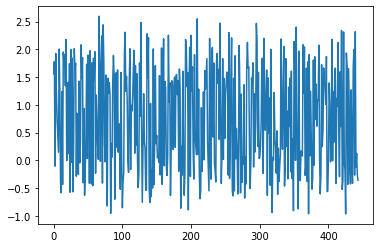

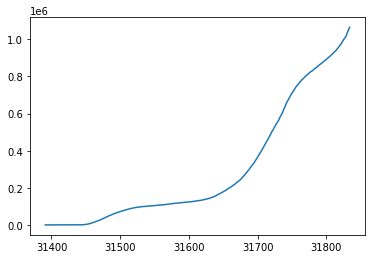

In [9]:

plt.plot(predict[0])
plt.show()

plt.plot(targets[:444])
plt.show()